<h2>Солохов Ильдар Ринатович ИУ5-23М<h2>
    Вариант 11

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

<h2>Задача №11</h2>

Для набора данных проведите устранение пропусков для одного (произвольного) категориального признака с использованием метода заполнения отдельной категорией для пропущенных значений.

In [2]:
data = pd.read_csv('downloads/Data.csv')

In [3]:
data

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,NaN,Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Netherlands,Eredivisie,(UTR),Gyrano Kerk,24,0,2155,10,7.49,0.33,50,18,2.20,0.79,2020
656,Netherlands,Eredivisie,(AJA),Quincy Promes,18,2,1573,12,9.77,0.59,56,30,3.38,1.81,2020
657,Netherlands,Eredivisie,(PSV),Denzel Dumfries,25,0,2363,7,5.72,0.23,45,14,1.81,0.56,2020
658,Netherlands,Eredivisie,None,Cyriel Dessers,26,0,2461,15,14.51,0.56,84,43,3.24,1.66,2020


In [4]:
data.dtypes

Country                     object
League                      object
Club                        object
Player Names                object
Matches_Played               int64
Substitution                 int64
Mins                         int64
Goals                        int64
xG                         float64
xG Per Avg Match           float64
Shots                        int64
OnTarget                     int64
Shots Per Avg Match        float64
On Target Per Avg Match    float64
Year                         int64
dtype: object

In [5]:
data.isnull().sum()

Country                    0
League                     0
Club                       6
Player Names               0
Matches_Played             0
Substitution               0
Mins                       0
Goals                      0
xG                         0
xG Per Avg Match           0
Shots                      0
OnTarget                   0
Shots Per Avg Match        0
On Target Per Avg Match    0
Year                       0
dtype: int64

In [6]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):

    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,))

Node_data=data['Club']
Club_name=impute_column(data, 'Club', 'constant', fill_value_param='No_data')
data['Club']=Club_name
data.isnull().sum()

Country                    0
League                     0
Club                       0
Player Names               0
Matches_Played             0
Substitution               0
Mins                       0
Goals                      0
xG                         0
xG Per Avg Match           0
Shots                      0
OnTarget                   0
Shots Per Avg Match        0
On Target Per Avg Match    0
Year                       0
dtype: int64

In [7]:
print("Количество устраненных пропусков: ", data['Club'].value_counts()['No_data'])

Количество устраненных пропусков:  6


In [8]:
data[data.Club == 'No_data']

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
3,Spain,La Liga,No_data,Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
13,Spain,La Liga,No_data,Gerard Moreno,37,0,3361,13,8.49,0.24,82,32,2.32,0.90,2016
15,Spain,La Liga,No_data,Wissam Ben Yedder,20,11,1735,11,7.85,0.43,44,23,2.41,1.26,2016
18,Spain,La Liga,No_data,Cedric Bakambu,17,9,1633,10,8.08,0.47,50,26,2.91,1.51,2016
23,Italy,Serie A,No_data,Nikola Kalinic,26,6,2648,15,15.05,0.54,90,61,3.23,2.19,2016
30,Italy,Serie A,No_data,Diego Falcinelli,35,1,3308,13,11.49,0.33,99,65,2.84,1.87,2016


<h2>Задача №31</h2>

Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод обертывания (wrapper method), прямой алгоритм (sequential forward selection).

In [9]:
data_2 = pd.read_csv('downloads/heart.csv')

In [10]:
data_2.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [11]:
X=data_2.drop(['event'], axis=1)
y=data_2['event']

In [12]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
sfs1 = SFS(knn, 
           k_features=4, 
           forward=True, 
           floating=False, 
           verbose=0,
           scoring='accuracy',
           cv=4)

sfs1 = sfs1.fit(X, y)

In [13]:
sfs1.subsets_

{1: {'feature_idx': (7,),
  'cv_scores': array([0.62666667, 0.70666667, 0.68      , 0.72972973]),
  'avg_score': 0.6857657657657659,
  'feature_names': ('serum_creatinine',)},
 2: {'feature_idx': (7, 9),
  'cv_scores': array([0.70666667, 0.73333333, 0.73333333, 0.74324324]),
  'avg_score': 0.7291441441441442,
  'feature_names': ('serum_creatinine', 'sex')},
 3: {'feature_idx': (7, 9, 10),
  'cv_scores': array([0.69333333, 0.76      , 0.72      , 0.63513514]),
  'avg_score': 0.7021171171171171,
  'feature_names': ('serum_creatinine', 'sex', 'smoking')},
 4: {'feature_idx': (5, 7, 9, 10),
  'cv_scores': array([0.69333333, 0.69333333, 0.73333333, 0.75675676]),
  'avg_score': 0.7191891891891893,
  'feature_names': ('high_blood_pressure',
   'serum_creatinine',
   'sex',
   'smoking')}}

In [14]:
print("Признаки: ", str(sfs1.k_feature_names_)[1:-1])

Признаки:  'high_blood_pressure', 'serum_creatinine', 'sex', 'smoking'


In [15]:
print("Оценка: ", sfs1.k_score_)

Оценка:  0.7191891891891893


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import mlxtend

knn1 = KNeighborsClassifier()

sfs1 = SFS(estimator=knn1, 
           k_features=4,
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=4)

pipe = Pipeline([('sfs', sfs1), 
                 ('knn1', knn1)])

param_grid = {
    'sfs__k_features': [1, 2, 3, 4],
    'sfs__estimator__n_neighbors': [2, 3, 4]
  }

gs = GridSearchCV(estimator=pipe, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  n_jobs=1, 
                  cv=4,
                  refit=False)

# run gridearch
gs = gs.fit(X, y)

In [17]:
for i in range(len(gs.cv_results_['params'])):
    print(gs.cv_results_['params'][i], 'test acc.:', gs.cv_results_['mean_test_score'][i])

{'sfs__estimator__n_neighbors': 2, 'sfs__k_features': 1} test acc.: 0.7027027027027027
{'sfs__estimator__n_neighbors': 2, 'sfs__k_features': 2} test acc.: 0.6922522522522523
{'sfs__estimator__n_neighbors': 2, 'sfs__k_features': 3} test acc.: 0.7022522522522523
{'sfs__estimator__n_neighbors': 2, 'sfs__k_features': 4} test acc.: 0.6822522522522523
{'sfs__estimator__n_neighbors': 3, 'sfs__k_features': 1} test acc.: 0.7027027027027027
{'sfs__estimator__n_neighbors': 3, 'sfs__k_features': 2} test acc.: 0.6922522522522523
{'sfs__estimator__n_neighbors': 3, 'sfs__k_features': 3} test acc.: 0.7022522522522523
{'sfs__estimator__n_neighbors': 3, 'sfs__k_features': 4} test acc.: 0.6822522522522523
{'sfs__estimator__n_neighbors': 4, 'sfs__k_features': 1} test acc.: 0.7027027027027027
{'sfs__estimator__n_neighbors': 4, 'sfs__k_features': 2} test acc.: 0.6922522522522523
{'sfs__estimator__n_neighbors': 4, 'sfs__k_features': 3} test acc.: 0.7022522522522523
{'sfs__estimator__n_neighbors': 4, 'sfs__k_

In [18]:
print("Best params", gs.best_params_)

Best params {'sfs__estimator__n_neighbors': 2, 'sfs__k_features': 1}


<h2>Дополнительные требования по группам:</h2>
Для студентов групп ИУ5-23М, ИУ5И-23М - для произвольной колонки данных построить график "Ящик с усами (boxplot)".

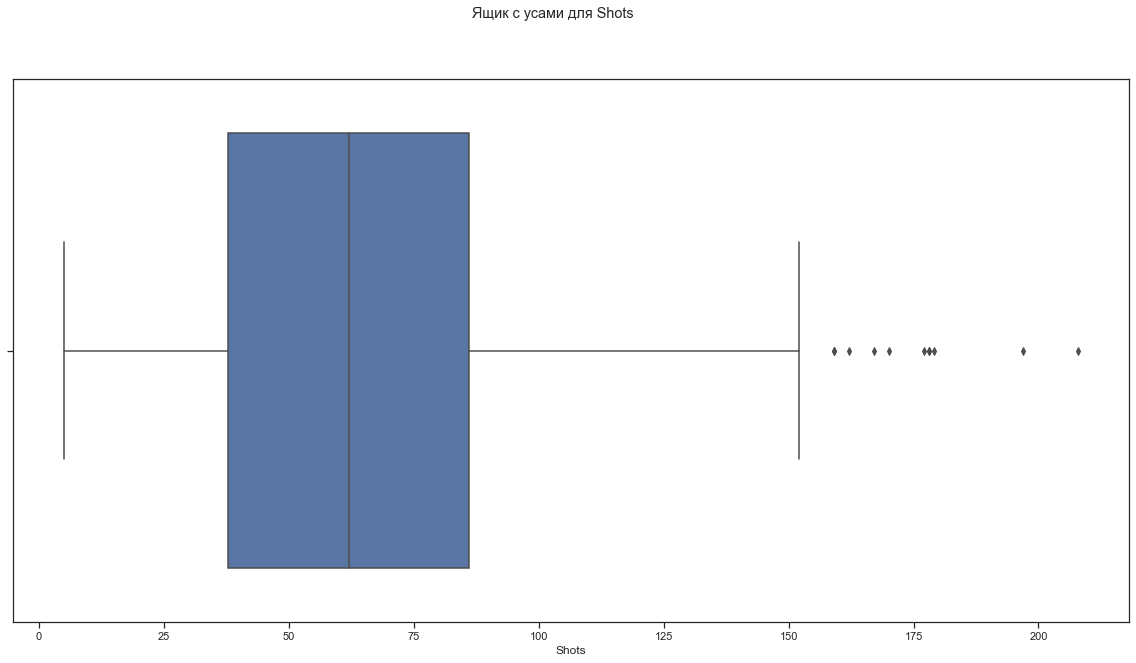

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x=data['Shots'])  
fig.suptitle('Ящик с усами для Shots')
plt.show()